In [1]:
# coding: utf-8

# # A Simple Autoencoder
# 
# We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, 
# we pass input data through an encoder that makes a compressed representation of the input. 
# Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder 
# and decoder will be built with neural networks, then trained on example data.
# 
# ![Autoencoder](assets/autoencoder_1.png)
# 
# In this notebook, we'll be build a simple network architecture for the encoder and decoder. 
# Let's get started by importing our libraries and getting the dataset.

# In[1]:

get_ipython().magic(u'matplotlib inline')

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


# In[2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

C:\Amrendra\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


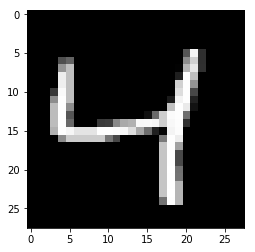

In [2]:
# Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

# In[3]:

img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [3]:
# We'll train an autoencoder with these images by flattening them into 784 length vectors. 
#The images from this dataset are already normalized such that the values are between 0 and 1. 
#Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. 
#This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. 
#The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, 
#we need to use a **sigmoid activation on the output layer** to get values matching the input.
# 
# ![Autoencoder architecture](assets/simple_autoencoder.png)
# 
# 
# > **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length
#vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output
#layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, 
#you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`]
#(https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. 
#The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for 
#this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn
#/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, 
#but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

# In[4]:

# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)


In [4]:
# ## Training

# In[5]:

# Create the session
sess = tf.Session()


# Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 
# 
# Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

# In[6]:

epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))



Epoch: 1/20... Training loss: 0.6947
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6796
Epoch: 1/20... Training loss: 0.6745
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6597
Epoch: 1/20... Training loss: 0.6503
Epoch: 1/20... Training loss: 0.6404
Epoch: 1/20... Training loss: 0.6281
Epoch: 1/20... Training loss: 0.6145
Epoch: 1/20... Training loss: 0.5990
Epoch: 1/20... Training loss: 0.5818
Epoch: 1/20... Training loss: 0.5672
Epoch: 1/20... Training loss: 0.5513
Epoch: 1/20... Training loss: 0.5322
Epoch: 1/20... Training loss: 0.5150
Epoch: 1/20... Training loss: 0.4943
Epoch: 1/20... Training loss: 0.4784
Epoch: 1/20... Training loss: 0.4611
Epoch: 1/20... Training loss: 0.4416
Epoch: 1/20... Training loss: 0.4266
Epoch: 1/20... Training loss: 0.4112
Epoch: 1/20... Training loss: 0.3941
Epoch: 1/20... Training loss: 0.3916
Epoch: 1/20... Training loss: 0.3765
E

Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.2016
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1848
E

Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1618
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1538
E

Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1348
E

Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1229
E

Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1122
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1094
E

Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0999
E

Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1013
E

Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0994
E

Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.1013
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1017
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0975
E

Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0990
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0982
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0895
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0981
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0880
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0986
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0878
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0935


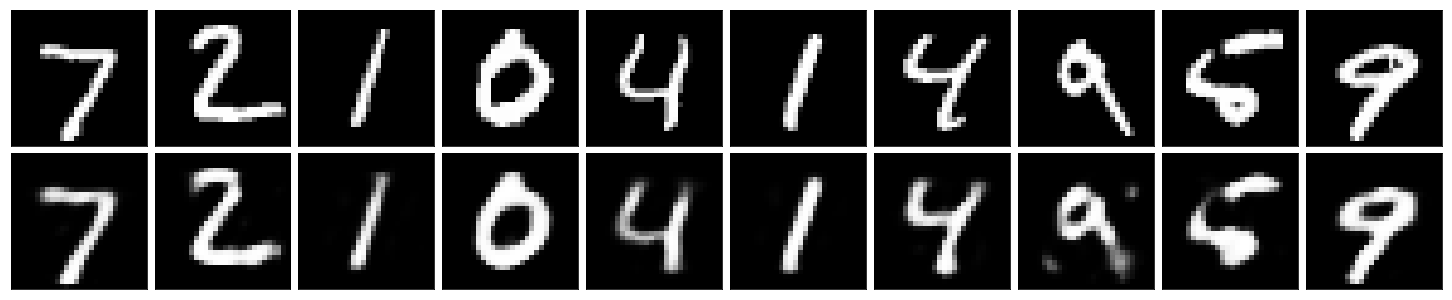

In [5]:
# Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

# In[7]:

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)


# In[8]:

sess.close()